# Building a User Car Prediction Model for Clutch
<br>
<br>
In this project, I will do some analysis on a sample data of used vehicles and deploy a Machine Learning model to predict vehicle prices by following the steps below.
<br>
<br>
1. <b>Import Packages:</b> We'll be importing relevant libraries and packages.
<br>
2. <b>Data Upload:</b> We are using a sample data scrape provided by Clutch.
<br>
3. <b>Business Problem:</b> We'll frame the problem based on the dataset description.
<br>
4. <b>Exploratory Data Analsis (EDA) I:</b> We'll carry out an exploratory analysis to figure out the important features and creating new combination of features.
<br>
5. <b>Data Cleaning and EDA II:</b> We'll clean the raw data and address any data quality issues. 
<br>
6. <b>Data Analysis:</b> At this step, we are going to be analyzing the cleaned data and providing insights. 
<br>
7. <b>Preprocessing and ML Modelling:</b> We'll process the data for ML models and do some feature engineering before we choose our ML algorithm. 
<br>

### Step 1: Import Packages

In [124]:
import datetime

import numpy as np
import pandas as pd

from wordcloud import WordCloud, STOPWORDS 

import re

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import statsmodels.api as sm


### Step 2: Data Upload

In [377]:
cars = pd.read_csv("vehicles.csv")

#Pandas normally shows a limited number of columns on Jupyter notebooks.
#The line below is enforcing it to display all the columns available. 
pd.set_option("display.max_columns", 15)
cars.head(5)



,id,first_date_seen,last_date_seen,vin,year,make,model,...,carfax_url,is_private,seller_name,city,province,longitude,latitude
0,243517,2021-04-05,2021-05-03,2g2wp552071227768,2007,Pontiac,Grand Prix,...,NaN,True,Private Seller,MISSISSAUGA,ON,-79.608894,43.531761
1,341545,2021-04-16,2021-05-03,5FRYD4H26GB501859,2016,Acura,MDX,...,https://vhr.carfax.ca/main?id=19Q9m3cFZqcImHGA...,False,Gorrud's Auto Group,Milton,ON,-79.889107,43.525890
2,345845,2021-04-16,2021-05-03,NaN,2005,Infiniti,G35X,...,NaN,True,Private Seller,MISSISSAUGA,ON,-79.594269,43.619488
3,254761,2021-04-08,2021-05-03,1FTFW1EF1GFC52035,2016,Ford,F-150,...,https://vhr.carfax.ca/main?id=sdxVNAZePXjizBpB...,False,BARRIE FORD,Barrie,ON,-79.690971,44.333801
4,256183,2021-04-08,2021-05-03,2HKRM4H50FH112277,2015,Honda,CR-V,...,https://vhr.carfax.ca/main?id=PuOEHO4lvLFFsJ8X...,False,TOP PICKS AUTO SALES,North Bay,ON,-79.452217,46.290520


### Step 3: Business Problem

The dataset provided by Clutch online dealership contains market data obtained from listing websites. The dataset contains <b>price</b> variable which is continuous data and tells us about the asking price of each car in the dataset.

Our aim here is to analyze the data and <b>predict the price </b> of a car given that we have other attributes of that vehicle.

### Step 4: Exploratory Data Analsis (EDA)
<br>
In this part, we will follow the steps below and do our EDA to get more information about our data.
<br>

* Check data size
* Check data type of columns
* Check for duplicate entries
* Check for null values
* Check for data entry error and outliers
* Look for the frequency distribution in categorical columns
* Initial insights

#### Check data size

In [126]:
print("No. of rows: "+ str(cars.shape[0]))
print("No. of columns: "+ str(len(cars.columns)))

No. of rows: 52236
No. of columns: 25


We have a total of <b> 52,236</b> rows. Let's see what types of data we have under columns and see if we need to any cleaning and transformation. 

#### Check data types of columns

In [379]:
pd.set_option("display.max_rows", 10)
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52236 entries, 0 to 52235
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               52236 non-null  int64  
 1   first_date_seen  52236 non-null  object 
 2   last_date_seen   52236 non-null  object 
 3   vin              41662 non-null  object 
 4   year             52236 non-null  int64  
 5   make             52236 non-null  object 
 6   model            52236 non-null  object 
 7   trim             48507 non-null  object 
 8   mileage          52129 non-null  float64
 9   price            52232 non-null  float64
 10  color            48810 non-null  object 
 11  body_type        48624 non-null  object 
 12  drivetrain       49503 non-null  object 
 13  transmission     50119 non-null  object 
 14  fuel_type        51012 non-null  object 
 15  engine           39242 non-null  object 
 16  passengers       21987 non-null  float64
 17  description 

#### Checking for duplicates


In [5]:
# Checking for duplicate entries but turns out there is none!
cars.duplicated().sum()

0

#### Checking for NULL values

As seen below, there are a lot null values that should be handled carefully. We'll address these issues going forward.

In [382]:
pd.set_option("display.max_rows",None)
print("No. of rows:",cars.shape[0])
print("\n")
print("No. of nulls by columns")
cars.isnull().sum()

No. of rows: 52236


No. of nulls by columns


id                     0
first_date_seen        0
last_date_seen         0
vin                10574
year                   0
make                   0
model                  0
trim                3729
mileage              107
price                  4
color               3426
body_type           3612
drivetrain          2733
transmission        2117
fuel_type           1224
engine             12994
passengers         30249
description         4237
carfax_url         26872
is_private             0
seller_name           16
city                   0
province               0
longitude              0
latitude               0
dtype: int64

#### Check for data entry error and outliers

Let's see the data types again.

In [7]:
cars.select_dtypes(include=['object', 'category']).columns

Index(['first_date_seen', 'last_date_seen', 'vin', 'make', 'model', 'trim',
       'color', 'body_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine', 'description', 'carfax_url', 'seller_name', 'city',
       'province'],
      dtype='object')

Maximum and minimum values for all the numeric values below will be investigated in the future steps with focus on outliers.

In [8]:
cars_numeric_fields = ['year','mileage','price','passengers']
cars[cars_numeric_fields].describe().apply(lambda s: s.apply('{0:.0f}'.format))

,year,mileage,price,passengers
count,52236,52129,52232,21987
mean,2015,90893,25344,5
std,6,81670,28192,1
min,1914,0,100,0
25%,2013,38631,11500,5
50%,2017,73000,19900,5
75%,2018,128000,31590,5
max,2022,3965000,1399888,17


The data was collected from <b>April 2, 2021</b> to <b>May 3, 2021.</b>

In [9]:
print(cars.first_date_seen.min())
print(cars.first_date_seen.max())
print(cars.last_date_seen.min())
print(cars.last_date_seen.max())

2021-04-02
2021-05-03
2021-04-02
2021-05-03


#### Look for the category distribution in categorical columns

In [385]:
pd.set_option("display.max_rows",20)

cars["make"].value_counts()

Honda            5296
Toyota           4736
Ford             4244
Chevrolet        3291
Hyundai          3287
                 ... 
Passport            1
Asuna               1
Excalibur           1
MV-1                1
Austin-Healey       1
Name: make, Length: 79, dtype: int64

In [386]:
cars["model"].value_counts()

Civic                             1299
CR-V                              1261
Corolla                           1107
RAV4                              1102
Elantra                            993
                                  ... 
Neon                                 1
1500 (*diesel * Low Km* Clean)       1
Super Deluxe                         1
4WD Compact Pickups                  1
Charger GT                           1
Name: model, Length: 1524, dtype: int64

In [387]:
cars.trim.value_counts()

SE                                                    465
LX                                                    344
Sport                                                 317
EX                                                    307
LE                                                    282
                                                     ... 
FWD 4dr SLE w-SLE-1                                     1
SXT PLUS | FCA CO CAR | 4X4 | QUAD CAB | SOFT TONN      1
ST 4WD Leather Navi Sunroof Street Pack                 1
xDrive Sedan | Prem Essential | Clean |                 1
BURMESTER,AMG Exhaust.19 INCH WHEELS,CAM,NAVI           1
Name: trim, Length: 26913, dtype: int64

In [388]:
cars.color.value_counts()

Black                                             8912
White                                             7580
Grey                                              4904
Blue                                              3432
Silver                                            3315
                                                  ... 
WHITE - 464                                          1
San Marino Blue Met                                  1
Thunder Grey Met                                     1
Solaris Orange                                       1
E400 4MATIC AMG PKG+Massage Seat+ACCIDENT FREE       1
Name: color, Length: 2504, dtype: int64

In [389]:
cars.body_type.value_counts()

SUV                    17024
Sedan                  15602
Hatchback               3882
Truck                   3481
Coupe                   2761
                       ...  
Cab and Chassis            1
Truck Long Crew Cab        1
Cutaway                    1
Truck Chassis              1
Avant                      1
Name: body_type, Length: 35, dtype: int64

In [390]:
cars.drivetrain.value_counts()

FWD    19520
AWD    17959
4x4     5299
RWD     3790
4WD     1828
4X4     1094
2WD       13
Name: drivetrain, dtype: int64

In [391]:
cars.transmission.value_counts()

Automatic                            27895
6 Speed Automatic                     6375
CVT                                   4636
8 Speed Automatic                     4024
Manual                                2683
                                     ...  
4 Speed Manual                           5
5 Speed Automatic with auto-shift        4
3 Speed Automatic                        2
2 Speed CVT                              1
Sequential                               1
Name: transmission, Length: 22, dtype: int64

In [392]:
cars.fuel_type.value_counts()

Gas                         34339
Gasoline                    10864
Premium Unleaded             1183
Diesel                       1058
Flexible                     1007
Regular Unleaded              944
Gasoline Hybrid               721
Electric                      356
Other                         238
Gasoline - Hybrid             162
E85- Gasoline(Flex Fuel)      115
Gasoline Fuel                  13
Other/Don’t Know               12
Name: fuel_type, dtype: int64

In [393]:
cars.engine.value_counts()

4 Cylinder Engine             10248
V6 Cylinder Engine             3921
8 Cylinder Engine              1531
2.0L 4cyl                      1519
2                              1087
                              ...  
4.8LTR                            1
2.5L 4-Cyl Engine                 1
Regular Unleaded V-8 5.7 L        1
4.6 L                             1
3.0 Liter twin turbo              1
Name: engine, Length: 1931, dtype: int64

In [394]:
cars.city.value_counts()

Toronto           4180
Ottawa            2517
Mississauga       2393
Brampton          1881
London            1877
                  ... 
GLEN ROBERTSON       1
KEARNEY              1
PORT STANLEY         1
INGLESIDE            1
ODESSA               1
Name: city, Length: 810, dtype: int64

In [395]:
cars.seller_name.value_counts()

Private Seller                    12507
Strickland's Stratford              308
CLUTCH - Belleville                 300
CLUTCH - Owen Sound                 300
Strickland's Automart               287
                                  ...  
Urban Motor Sales                     1
Independent Vehicle Services          1
KAIZEN RENT A CAR INCORPORATED        1
ARS                                   1
Nav Bhatia's Rexdale Hyundai          1
Name: seller_name, Length: 1617, dtype: int64

#### Initial insights

Looking at the initial EDA above, we can say that dataset is not the cleanest in the world. But it is an interesting one to work on for sure!

We will clean it by fixing data entry errors, imputing NULL values, clearing outliers, handling categorical values by string manipulations and some feature engineering in further steps.

### Step 5: Data Cleaning and EDA II
<br>
In this part, we'll clean the raw data and address any data quality issues by following the steps below.
<br>

* Correct data type issues
* Handle categorical variables with string manipulations
* Impute null values in categorical values, drop if needed
* Fix issues in numerical columns
* Look for new variables
<br>

####  Correct data type issues

* Let's see the datatypes again and decide what to do!


In [396]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52236 entries, 0 to 52235
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               52236 non-null  int64  
 1   first_date_seen  52236 non-null  object 
 2   last_date_seen   52236 non-null  object 
 3   vin              41662 non-null  object 
 4   year             52236 non-null  int64  
 5   make             52236 non-null  object 
 6   model            52236 non-null  object 
 7   trim             48507 non-null  object 
 8   mileage          52129 non-null  float64
 9   price            52232 non-null  float64
 10  color            48810 non-null  object 
 11  body_type        48624 non-null  object 
 12  drivetrain       49503 non-null  object 
 13  transmission     50119 non-null  object 
 14  fuel_type        51012 non-null  object 
 15  engine           39242 non-null  object 
 16  passengers       21987 non-null  float64
 17  description 

 * First off the bat, let's get the datefields correct. 

In [22]:
cars.first_date_seen=pd.to_datetime(cars.first_date_seen)
cars.last_date_seen=pd.to_datetime(cars.last_date_seen)

* <b>vin</b> and <b>carfax_url</b> fields have unique values for each and every data point so it's helpful to convert them to boolean. This info will also be relavant in our further analysis.

In [397]:
cars['vin_provided'] = cars.vin.apply(lambda x: 0 if pd.isnull(x) else 1)
cars['carfax_provided'] = cars.carfax_url.apply(lambda x: 0 if pd.isnull(x) else 1)
cars['is_private'] = cars.is_private.apply(lambda x: 0 if x is False else 1)
cars= cars.drop(columns=['vin','carfax_url'])

* <b>Trim</b> level has a lot of unique text info for each data point but it is not eligible to be converted into a categorical or a numeric column. So, our best bet is to merge it with the description column so that we can get some insights from the merged field.

In [398]:
cars["description"] = cars["trim"].map(str)+ ' ' + cars["description"].map(str)
cars= cars.drop(columns=['trim'])

#### Handle categorical variables with string manipulations

* Color field is an important one but has a lot of unique values that needs a bit of string manipulation.

In [399]:
cars.color.value_counts()

Black                                             8912
White                                             7580
Grey                                              4904
Blue                                              3432
Silver                                            3315
                                                  ... 
WHITE - 464                                          1
San Marino Blue Met                                  1
Thunder Grey Met                                     1
Solaris Orange                                       1
E400 4MATIC AMG PKG+Massage Seat+ACCIDENT FREE       1
Name: color, Length: 2504, dtype: int64

In [400]:
cars.loc[cars['color'].str.contains('white',na=False,flags=re.IGNORECASE), 'color'] = 'White'
cars.loc[cars['color'].str.contains('black',na=False,flags=re.IGNORECASE), 'color'] = 'Black'
cars.loc[cars['color'].str.contains('red',na=False,flags=re.IGNORECASE), 'color'] = 'Red'
cars.loc[cars['color'].str.contains('silver',na=False,flags=re.IGNORECASE), 'color'] = 'Silver'
cars.loc[cars['color'].str.contains('gray',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('grey',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('charcoal',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('granite',na=False,flags=re.IGNORECASE), 'color'] = 'Gray'
cars.loc[cars['color'].str.contains('blue',na=False,flags=re.IGNORECASE), 'color'] = 'Blue'
cars.loc[cars['color'].str.contains('metallic',na=False,flags=re.IGNORECASE), 'color'] = 'Metallic'
cars.loc[cars['color'].str.contains('steel',na=False,flags=re.IGNORECASE), 'color'] = 'Metallic'
cars.loc[cars['color'].str.contains('green',na=False,flags=re.IGNORECASE), 'color'] = 'Green'
cars.loc[cars['color'].str.contains('brown',na=False,flags=re.IGNORECASE), 'color'] = 'Brown'

cars["color"] = \
             np.where(cars.groupby(["color"])["color"].transform('count') >= 50, 
                      cars.color, 'Other')
cars.loc[cars.color=='Not Specified',"color"]="Other"
cars.color.value_counts()


Black             12446
White             10897
Gray               7579
Blue               4910
Other              4813
Silver             4759
Red                3452
Metallic           1004
Green               490
Brown               458
Beige               364
Orange              249
Gold                229
Burgundy            146
Yellow              140
Blizzard Pearl      102
Maroon               82
Purple               62
Bronze               54
Name: color, dtype: int64

* There are a lot of car manufacturers under <b>make</b> field and the size of the unique list makes it harder to analyze. So, I am going to mask them by tagging smaller brands as 'Other'. This is totally a random threshold. I initially set it to <b>brands with # of records > 100</b> but that was filtering out many sport vehicles and I did not want to exclude them. Instead, I remove those under 15.

In [401]:
cars["make"] = \
             np.where(cars.groupby(["make"])["make"].transform('count') >= 15, 
                      cars.make, 'Other')
cars.loc[cars['make'].str.contains('mercedes',na=False,flags=re.IGNORECASE), "make"] = 'Mercedes'
cars.make.value_counts()

Honda          5296
Toyota         4736
Ford           4244
Chevrolet      3291
Hyundai        3287
               ... 
Mercury          17
Sterling         16
Saab             15
Rolls-Royce      15
MG               15
Name: make, Length: 55, dtype: int64

* Can't do anything about the <b>model</b> field. There are many unique fields for each car brand and it is not feasible to do any sory of transformation on it. I'll just display the unique values here!

In [402]:
cars.model.str.title().value_counts()

Civic                         1299
Cr-V                          1261
Corolla                       1107
Rav4                          1102
Elantra                        993
                              ... 
Allroad                          1
Shadow                           1
Rav4 Hybrid Xle                  1
1500 Big Horn | 8.4 Screen       1
Charger Gt                       1
Name: model, Length: 1523, dtype: int64

* <b>Body_type</b> field might help us drive insights from the dataset but it requires a bit of string manipulations. If I have time, I will write a separate function for the code below because this type of cleaning is required for other fields as well. 

In [403]:
cars.loc[cars['body_type'].str.contains('truck',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('cabriolet',na=False,flags=re.IGNORECASE), 'body_type'] = 'Convertible'
cars.loc[cars['body_type'].str.contains('cab',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('wagon',na=False,flags=re.IGNORECASE), 'body_type'] = 'Station Wagon'
cars.loc[cars['body_type'].str.contains('super crew',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('cutaway',na=False,flags=re.IGNORECASE), 'body_type'] = 'Truck'
cars.loc[cars['body_type'].str.contains('avant',na=False,flags=re.IGNORECASE), 'body_type'] = 'Station Wagon'

cars.body_type.value_counts()

SUV              17024
Sedan            15602
Truck             4773
Hatchback         3882
Coupe             2761
Minivan           2024
Convertible       1192
Station Wagon     1072
Compact            283
Roadster            11
Name: body_type, dtype: int64

* <b>Drive_Train</b> columns is also useful one. It also needs a bit of string manipulations. A little domain knowledge might come in handy at this part of the analysis. You can also do online research about what the main drive_train types are and what keywords are used interchangibly for those categories.   

In [30]:
cars.drivetrain.value_counts()

FWD    19520
AWD    17959
4x4     5299
RWD     3790
4WD     1828
4X4     1094
2WD       13
Name: drivetrain, dtype: int64

In [404]:
cars.loc[cars.drivetrain == '2WD', 'drivetrain'] = "FWD" # this one is just an assumption. It could be RWD as well!
cars.loc[cars.drivetrain.isin(['4X4','4x4']), 'drivetrain'] = "4WD"
cars.drivetrain.value_counts()

FWD    19533
AWD    17959
4WD     8221
RWD     3790
Name: drivetrain, dtype: int64

* <b> Transmission </b> field is also a valueable one. We are applying our good old method to do some transformation here as well. 

In [405]:
cars.transmission=cars.transmission.astype('str')

cars.loc[cars['transmission'].str.contains('Automatic'), 'transmission'] = 'Automatic'
cars.loc[cars['transmission'].str.contains('Manual'), 'transmission'] = 'Manual'
cars.loc[cars['transmission'].str.contains('Sequential'), 'transmission'] = 'Manual'
cars.loc[cars['transmission'].str.contains('CVT'), 'transmission'] = 'CVT'

cars.loc[cars.transmission == 'nan', 'transmission'] = None

* Let's also look at the <b>fuel_type</b> field. 

In [406]:
cars['fuel_type'] = cars['fuel_type'].replace(['Premium Unleaded','Gasoline','Gasoline Fuel','Regular Unleaded'],'Gas')
cars['fuel_type'] = cars['fuel_type'].replace(['E85- Gasoline(Flex Fuel)'],'Flexible')
cars['fuel_type'] = cars['fuel_type'].replace(['Other/Don’t Know'],'Other')
cars['fuel_type'] = cars['fuel_type'].replace(['Gasoline Hybrid','Gasoline - Hybrid'],'Hybrid')

* For the <b>engine </b> field, we are going to do our transformation. However, due to the way that data points were entered, it is not too feasible to work on every unique record. Instead, we will focus on transforming the field so in a way that we can extract <b># of cylinders</b> as a close proxy in a separate field in the further steps.   

In [407]:
cars.loc[cars['engine'].str.contains("4 cyl",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("4 cyclinder",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("4-cyclinder",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("4cyl",na=False,flags=re.IGNORECASE), "engine"] = '4 Cylinder'
cars.loc[cars['engine'].str.contains("6 cyl",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("6cyl",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("8cyl",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'
cars.loc[cars['engine'].str.contains("8 cylinder",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'
cars.loc[cars['engine'].str.contains("v6",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("v-6",na=False,flags=re.IGNORECASE), "engine"] = '6 Cylinder'
cars.loc[cars['engine'].str.contains("3 cylinder",na=False,flags=re.IGNORECASE), "engine"] = '3 Cylinder'
cars.loc[cars['engine'].str.contains("5 cylinder",na=False,flags=re.IGNORECASE), "engine"] = '5 Cylinder'
cars.loc[cars['engine'].str.contains("5cyl",na=False,flags=re.IGNORECASE), "engine"] = '5 Cylinder'
cars.loc[cars['engine'].str.contains("3cyl",na=False,flags=re.IGNORECASE), "engine"] = '3 Cylinder'
cars.loc[cars['engine'].str.contains("v8",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'
cars.loc[cars['engine'].str.contains("v-8",na=False,flags=re.IGNORECASE), "engine"] = '8 Cylinder'

cars.loc[~cars.engine.isin(['4 Cylinder','6 Cylinder','8 Cylinder','3 Cylinder','5 Cylinder']),'engine'] = None

* Nothing interesting in this <b>seller_name</b> field because there are all small dealers except for a few big chains. If we had more data points from CLUTCH, we might have been able to calculate a new field and see if it is significant at all. But unfortunately we have not! Also, the largest group in the output below is 'Private' sellers. We already have a separate column for this information. That's why we'll drop this column in the next steps.

In [408]:
cars.loc[cars['seller_name'].str.contains("toyota",na=False,flags=re.IGNORECASE), "seller2"] = 'toyota'
cars.loc[cars['seller_name'].str.contains("honda",na=False,flags=re.IGNORECASE), "seller2"] = 'honda'
cars.loc[cars['seller_name'].str.contains("clutch",na=False,flags=re.IGNORECASE), "seller2"] = 'clutch'
cars.loc[cars['seller_name'].str.contains("dodge",na=False,flags=re.IGNORECASE), "seller2"] = 'dodge'
cars.loc[cars['seller_name'].str.contains("private",na=False,flags=re.IGNORECASE), "seller2"] = 'private'
cars.loc[cars['seller_name'].str.contains("ford",na=False,flags=re.IGNORECASE), "seller2"] = 'ford'
cars.loc[cars['seller_name'].str.contains("hyundai",na=False,flags=re.IGNORECASE), "seller2"] = 'hyundai'


cars.seller2.value_counts()

private    12507
ford        3095
honda       2702
toyota      2275
dodge       1711
hyundai     1566
clutch       985
Name: seller2, dtype: int64

####  Impute null values, drop them if needed

We have a lot of null values. We will use two techniques to get rid of them or impute them from other fields where applicable. Main NULL elimination techniques we use are: 
* Backward, forward imputation
* Taking group mean

First, let's see how many we got null values in each field.

In [409]:
cars.isnull().sum()

id                     0
first_date_seen        0
last_date_seen         0
year                   0
make                   0
                   ...  
longitude              0
latitude               0
vin_provided           0
carfax_provided        0
seller2            27395
Length: 25, dtype: int64

In [410]:
cars['body_type']=cars.groupby('model')['body_type'].ffill().bfill()
cars.body_type.value_counts()

SUV              19815
Sedan            15959
Truck             4852
Hatchback         3973
Coupe             2836
Minivan           2111
Convertible       1242
Station Wagon     1150
Compact            286
Roadster            12
Name: body_type, dtype: int64

In [411]:
cars['drivetrain']=cars.groupby(['make','model'])['drivetrain'].ffill().bfill()

cars.drivetrain.value_counts()

FWD    21238
AWD    18488
4WD     8428
RWD     4082
Name: drivetrain, dtype: int64

In [412]:
cars['transmission']=cars.groupby(['make','model'])['transmission'].ffill().bfill()
cars.transmission.value_counts()

Automatic    43607
CVT           4780
Manual        3849
Name: transmission, dtype: int64

In [413]:
cars['fuel_type']=cars.groupby(['make','model'])['fuel_type'].ffill().bfill()
cars["fuel_type"].value_counts()

Gas         48512
Flexible     1138
Diesel       1072
Hybrid        897
Electric      362
Other         255
Name: fuel_type, dtype: int64

In [414]:
cars['engine']=cars.groupby(['make','model','body_type'])['engine'].ffill().bfill()

cars["cylinders"]=cars.engine.str.replace('Cylinder','',regex=True).astype(int)
cars= cars.drop(columns=['engine'])
cars.cylinders.value_counts()

4    31228
6    15238
8     5342
3      237
5      191
Name: cylinders, dtype: int64

In [416]:
cars["city"] = cars.city.str.title() #Fixing UPPER, LOWER case inconsistencies.

cars.loc[cars.city == 'Richmond', 'city'] = 'Richmond Hill' #City was mistakenly recorded as Richmond (BC) instead of 
## Richmond Hill (ON). I checked the longitude and latitude values to make sure and fix it manually.


toronto_gta=['Toronto','North York','Scarborough','Etobicoke','York'
            'Burlington','Oakville','Milton','Halton Hills',
            'Mississauga','Brampton','Caledon',
             'Vaughan','Concord','Unionville','Markham','Newmarket','Richmond Hil','King','Stouffville',
             'East Gwillimbury','Whitchurch-Stouffville','Aurora','Georgina',
             'Pickering','Ajax','Whitby','Uxbridge','Brock','Scugog','Oshawa','Clarington'
            ] 
## There a lot of unique values so instead we are creating a new, boolean column to check if the car is in Toronto GTA.

cars["toronto_gta"]= np.where(cars.city.str.contains('|'.join(toronto_gta)), 1, 0)

cars.toronto_gta.value_counts()

0    27931
1    24305
Name: toronto_gta, dtype: int64

In [417]:
cars=cars.drop(columns=['seller_name','seller2']) # Dropping seller name columns b/c we're not getting any info from them.  

#### Fix issues in numerical columns

In [418]:
cars.describe()

,id,year,mileage,price,passengers,is_private,longitude,latitude,vin_provided,carfax_provided,cylinders,toronto_gta
count,52236.000000,52236.000000,52129.000000,52232.000000,21987.000000,52236.000000,52236.000000,52236.000000,52236.000000,52236.000000,52236.000000,52236.000000
mean,329720.278582,2014.805288,90893.014157,25343.834737,5.036385,0.239433,-79.331784,43.821639,0.797573,0.485566,4.991615,0.465292
std,62476.292908,6.118057,81670.438786,28191.647047,1.252359,0.426741,2.009345,0.760756,0.401813,0.499796,1.352055,0.498799
min,229825.000000,1914.000000,0.000000,100.000000,0.000000,0.000000,-116.521500,42.029045,0.000000,0.000000,3.000000,0.000000
25%,266646.750000,2013.000000,38631.000000,11500.000000,5.000000,0.000000,-79.875504,43.438549,1.000000,0.000000,4.000000,0.000000
50%,349246.500000,2017.000000,73000.000000,19900.000000,5.000000,0.000000,-79.549228,43.726730,1.000000,0.000000,4.000000,0.000000
75%,384191.250000,2018.000000,128000.000000,31590.000000,5.000000,0.000000,-79.262787,43.939625,1.000000,1.000000,6.000000,1.000000
max,419557.000000,2022.000000,3965000.000000,1399888.000000,17.000000,1.000000,-53.979370,51.016666,1.000000,1.000000,8.000000,1.000000


* <b>Year</b>

In [419]:
cars[cars.year== 1914] #Checking if 1914 is a data entry or an actual data point.

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,province,longitude,latitude,vin_provided,carfax_provided,cylinders,toronto_gta
40446,282901,2021-04-14,2021-04-15,1914,Ford,Model T,123.000000,...,ON,-78.150002,44.033333,0,0,4,0
40887,283104,2021-04-14,2021-04-15,1914,Ford,Model T,124.000000,...,ON,-78.150002,44.033333,0,0,6,0


These two cars look like they are duplicates and they are from Baltimore, a US city out of the scope of this analysis. Let's remove them.


In [420]:
cars=cars[cars.city.str.title()!='Baltimore']

Now, it is better that we bring an age field created from the year column.

In [421]:
cars["age"]=2021-cars["year"]

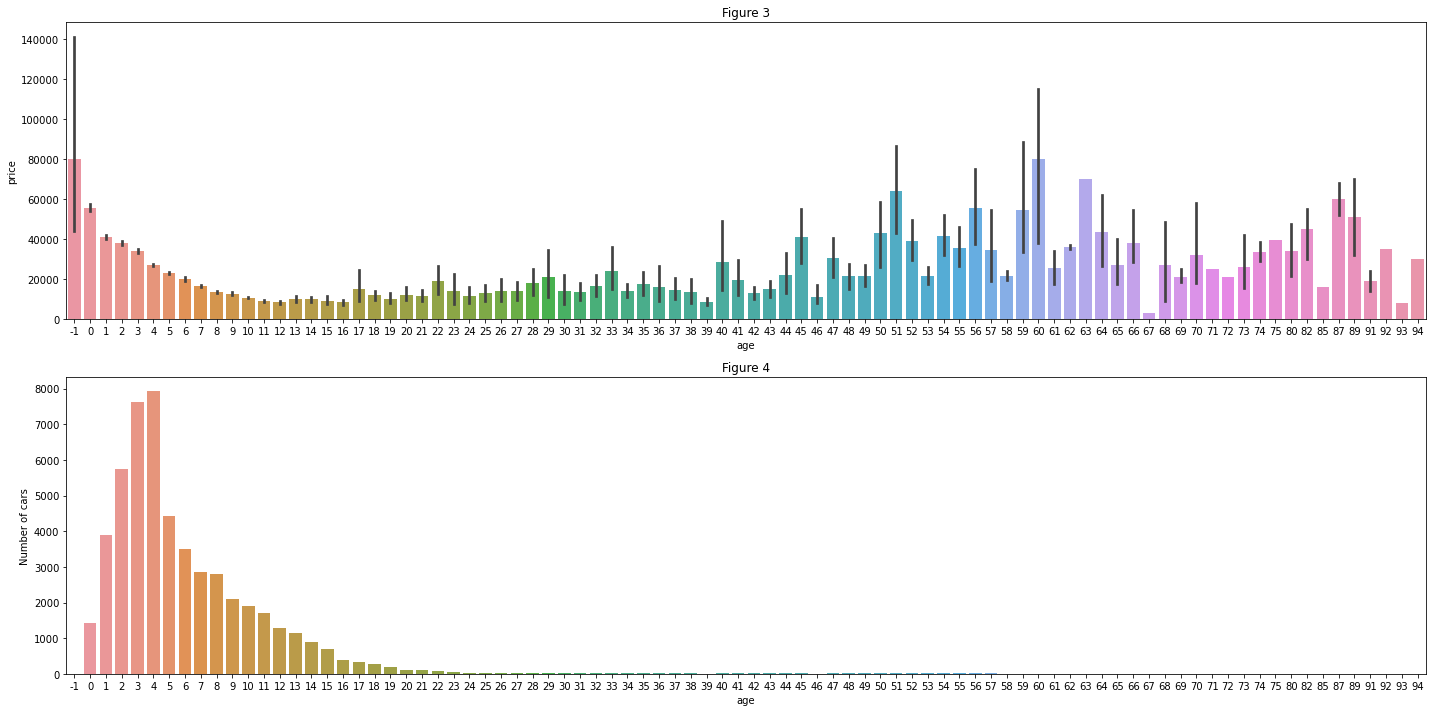

In [422]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='age',y='price',data=cars,ax=axs[0])
sns.barplot(cars.groupby('age').count()['price'].index,cars.groupby('age').count()['price'].values,ax=axs[1])
axs[0].set_title('Figure 3')
axs[1].set_title('Figure 4')
axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.show()

Looking at the graphs above, it makes a lot of sense to me that at this point we should create a new field that would account old, classic cars or in broader terms vehicles that increase in value as they get old unlike the new cars?

In most provinces in Canada, the minimum age for a car to get vintage license plate is 30.

In [423]:
cars.loc[cars.age > 30, "vintage"] = 1
cars.loc[cars.vintage != 1, "vintage"] = 0  
cars.vintage.value_counts()

0.000000    51711
1.000000      519
Name: vintage, dtype: int64

* <b>Mileage</b>

In [424]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #Just a formatting script

cars.mileage.describe()

count     52123
mean      90894
std       81667
min           0
25%       38635
50%       73000
75%      128000
max     3965000
Name: mileage, dtype: float64

In [425]:
cars.loc[(cars.mileage==0) & (cars.year < 2019),'mileage']=None # Assuming that old cars can't have 0 km.

In [426]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
cars.mileage.describe()

count     52034
mean      91050
std       81651
min           0
25%       38800
50%       73103
75%      128000
max     3965000
Name: mileage, dtype: float64

In [427]:
## Again we are subsetting our data. This is not by intuition. I checked the vehicle with the max mileage(3965000).
## Turns out it is a data error with null values in other fields too. That's why I removed it and limited our 
## analysis to only those below 3,000,000 altough this, too, smells fishy. We'll take care of it in the next steps!

cars= cars[cars['mileage'] < 3000000] 
cars.mileage.describe()


count     52032
mean      90919
std       78842
min           0
25%       38800
50%       73102
75%      128000
max     2900000
Name: mileage, dtype: float64

In [182]:
cars[cars['mileage'] > 1000000]

#looks like people were putting an extra digit by mistake. We can divide those by 10 and fix this issue.


,id,first_date_seen,last_date_seen,vin,year,make,model,trim,mileage,price,color,body_type,drivetrain,transmission,fuel_type,engine,passengers,description,carfax_url,is_private,seller_name,city,province,longitude,latitude,age,vintage
2571,389613,2021-04-27,2021-04-27,NaN,2012,Mazda,Mazda3,4dr Sdn Auto GS-SKY,2320000,2500,White,Sedan,FWD,Automatic,Gasoline,NaN,NaN,"2012 Mazda 3 sky active, 232,000km. Selling as...",NaN,True,Private Seller,KESWICK,ON,-79,44,9,0
3318,369570,2021-04-22,2021-05-03,JM1BL1SFXA1253779,2010,Mazda,Mazda3,4dr Sdn Auto GX,2390000,3200,NaN,Sedan,FWD,Automatic,NaN,NaN,NaN,"Certified safety, great condition, no rust, 2n...",NaN,True,Private Seller,BURLINGTON,ON,-80,43,11,0
3873,373442,2021-04-23,2021-04-27,NaN,2006,Audi,A6 Sedan,NaN,1840000,7000,Silver,Sedan,AWD,Automatic,Gasoline,NaN,NaN,"I’m looking to sell my 2006 Audi A6 3.2l, as I...",NaN,True,Private Seller,LONDON,ON,-81,43,15,0
6507,349641,2021-04-17,2021-05-03,NaN,2006,BMW,330I,330I automatic,1480000,7000,Silver,Sedan,RWD,Automatic,Gasoline,NaN,NaN,I’m selling my Bmw 330i. This car has been onl...,NaN,True,Private Seller,ETOBICOKE,ON,-79,44,15,0
7567,262496,2021-04-09,2021-04-27,NaN,2005,Honda,Accord,4dr LX-G Auto,1534000,3500,Grey,Sedan,FWD,Automatic,Gasoline,NaN,NaN,Mint condition well kept 2nd owner vehicle 2 4...,NaN,True,Private Seller,EAST YORK,ON,-79,44,16,0
13682,386743,2021-04-26,2021-04-30,NaN,2010,Acura,TSX,4dr Sdn I4 Auto w/Tech Pkg,2100000,5900,Grey,Sedan,FWD,Automatic,Gasoline,NaN,NaN,2nd Owner of the car. Car was bought by the Fi...,NaN,True,Private Seller,MISSISSAUGA,ON,-80,44,11,0
18779,255232,2021-04-08,2021-04-10,NaN,2010,Ford,F-150,2WD SuperCab 145 XLT,2280359,9000,Blue,Truck,4X4,Automatic,Gasoline,NaN,NaN,2010 for f-50 XTR package navigation. system B...,NaN,True,Private Seller,INNISFIL,ON,-80,44,11,0
18835,243603,2021-04-05,2021-05-03,1HGCP2F7XAA803582,2010,Honda,Accord,2dr I4 Auto EX,1680000,8000,Black,Sedan,FWD,Automatic,Gasoline,NaN,NaN,Honda Accord 2010 EX black 168000km driven Mai...,https://vhr.carfax.ca/?id=VC+c8BPXqkO7eiu1xm+h...,True,Private Seller,MILTON,ON,-80,44,11,0
19871,367269,2021-04-22,2021-05-03,NaN,2015,Chevrolet,Suburban,4WD 4dr LT,1760000,29400,White,NaN,4X4,Automatic,Gasoline,NaN,NaN,8 passenger Heated Leather seats Sunroof,NaN,True,Private Seller,PEMBROKE,ON,-77,46,6,0
20233,418635,2021-05-03,2021-05-03,NaN,2007,BMW,335i,NaN,2200000,9000,Black,Sedan,RWD,Automatic,Gasoline,NaN,NaN,Selling my 335i car is clean sounds really goo...,NaN,True,Private Seller,NEWMARKET,ON,-79,44,14,0


In [428]:
cars.loc[(cars.mileage>1000000),'mileage']=cars.mileage/10

In [429]:
cars.mileage.describe()

count    52032
mean     90258
std      69742
min          0
25%      38800
50%      73102
75%     128000
max     999999
Name: mileage, dtype: float64

In [430]:
cars.loc[(cars.mileage>500000) & (cars.year > 2015),:] #Let'see what cars we have next in terms of highest odomoter reading.


,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
11701,235302,2021-04-03,2021-04-23,2017,Ford,Mustang,649000,...,44,0,0,4,1,4,0
29688,415292,2021-05-02,2021-05-03,2018,Volkswagen,Golf Alltrack,833399,...,43,1,1,4,0,3,0
34539,245354,2021-04-06,2021-05-03,2017,Volkswagen,Jetta Sedan,670000,...,44,0,0,4,1,4,0
41989,411175,2021-05-01,2021-05-03,2017,Nissan,Rogue,517984,...,44,1,1,4,1,4,0


In [431]:
cars.loc[(cars.mileage>500000) & (cars.year > 2015),'mileage']=cars.mileage/10 ## same issue with relatively new cars.

In [432]:
cars.mileage.describe()

count    52032
mean     90212
std      69551
min          0
25%      38800
50%      73089
75%     128000
max     999999
Name: mileage, dtype: float64

In [433]:
cars[cars.mileage==999999] # Who is this Number-9-lover?

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
5968,240570,2021-04-04,2021-05-03,2000,Volkswagen,Jetta,999999,...,43,0,0,4,0,21,0


In [434]:
cars.loc[(cars.mileage==999999),'mileage']=None ## A data error by the looks of it.

In [435]:
cars.mileage.describe()
# Checked other cars with odomoter readings of upwards of 500,000. Althoug they look a little suspicious too,
# I won't remove them b/c they are all trucks. I have always used sedan. Not so much insight into larger vehicles.
# Someone with more domain knowledge might be able to handle this better. 

count    52031
mean     90195
std      69438
min          0
25%      38800
50%      73089
75%     128000
max     990000
Name: mileage, dtype: float64

In [436]:
cars.loc[(cars.mileage>0) & (cars.mileage < 500)& (cars.year < 2015),:] 
# Next, we are investigating olders vehicles with seemingly low KM on them. 

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
1621,255081,2021-04-08,2021-04-22,2011,Chevrolet,Equinox,1,...,44,1,0,4,1,10,0
1884,399916,2021-04-29,2021-05-03,2013,Buick,LaCrosse,270,...,43,1,0,4,0,8,0
3563,260893,2021-04-09,2021-05-03,2012,Honda,Civic Sedan,160,...,44,0,0,4,1,9,0
4395,254714,2021-04-08,2021-04-08,2006,Honda,CR-V,189,...,44,0,0,4,1,15,0
4579,282894,2021-04-14,2021-04-28,2002,Toyota,RAV4,230,...,44,0,0,4,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49262,245087,2021-04-06,2021-04-10,2010,Mazda,Mazda5,1,...,44,1,0,4,1,11,0
49591,386535,2021-04-26,2021-05-03,2006,Kia,Rio 5-door,171,...,44,0,0,4,0,15,0
49639,272872,2021-04-11,2021-05-03,1956,Oldsmobile,88,100,...,43,0,0,4,0,65,1
50892,249287,2021-04-07,2021-05-03,2011,Buick,Lucerne,125,...,44,1,0,6,0,10,0


In [437]:
cars.loc[(cars.mileage>0) & (cars.mileage < 500) & (cars.year < 2015),'mileage']=None

# We're rendering them all NULL. We'll later impute them with other NULL values by using back and forward filling
# based on other fields.

In [438]:
cars['mileage'] = cars.groupby(['make','year'])['mileage'].apply(lambda x: x.fillna(x.mean()))
cars.mileage.isnull().sum()

11

In [439]:
cars['mileage'] = cars.groupby(['year'])['mileage'].apply(lambda x: x.fillna(x.mean()))
## still some null values that's why we are now using avg odometer readings of the vehicles with the same year.
# Depreciation should be more or less the same for the cars with same age.

* <b>Price</b> 

In [440]:
cars.price.describe()

count     52028
mean      25327
std       28144
min         100
25%       11500
50%       19900
75%       31580
max     1399888
Name: price, dtype: float64

In [441]:
cars[cars.price>500000] # Surprisingly,nothing looks fishy! All look sport cars and we'll keep them.

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
70,359071,2021-04-20,2021-05-03,2019,Lamborghini,Aventador,1637,...,44,1,0,3,1,2,0
1273,236142,2021-04-03,2021-05-03,2018,Ford,Unlisted Item,42,...,44,1,1,6,0,3,0
6643,229919,2021-04-02,2021-05-03,2020,Ferrari,812 Superfast,2450,...,44,0,0,4,1,1,0
9306,332707,2021-04-15,2021-05-03,2019,Ferrari,812,1017,...,44,1,1,4,0,2,0
17551,387491,2021-04-26,2021-05-03,2015,Cadillac,ATS,85000,...,44,0,0,4,1,6,0
19143,410670,2021-05-01,2021-05-03,2004,Porsche,Carrera GT,5190,...,43,0,0,4,1,17,0
20066,245438,2021-04-06,2021-05-03,2019,Lamborghini,Aventador,1275,...,43,1,1,4,1,2,0
21508,373758,2021-04-23,2021-05-03,2021,Rolls-Royce,Ghost,2645,...,43,0,0,4,0,0,0
26612,411398,2021-05-01,2021-05-03,2020,Ferrari,488,3163,...,44,1,1,8,0,1,0
29694,411539,2021-05-01,2021-05-03,2006,Ford,GT,182310,...,43,0,0,4,1,15,0


In [442]:
cars[cars.price<500] #Checking to see if there is any data errors on cars cheaper than 500$.

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
10583,415171,2021-05-02,2021-05-03,2006,Saturn,Ion,273000,...,43,1,0,4,0,15,0
11682,230242,2021-04-02,2021-04-03,1991,Other,Vista,448386,...,44,0,0,4,1,30,0
13362,331903,2021-04-15,2021-04-22,1980,Other,Sunfire,123456,...,44,0,0,6,1,41,1
17339,404911,2021-04-30,2021-05-03,2006,Toyota,Sienna,235000,...,45,1,0,6,0,15,0
17798,282591,2021-04-14,2021-04-25,1997,BMW,Z3,12345,...,44,0,0,8,1,24,0
18710,387912,2021-04-26,2021-05-03,2005,GMC,Canyon,300000,...,43,0,0,6,0,16,0
28504,332148,2021-04-15,2021-05-03,2009,Mazda,Mazda3,40000,...,44,0,0,4,1,12,0
35080,255297,2021-04-08,2021-05-03,1973,Cadillac,Eldorado,95000,...,44,0,0,6,0,48,1
40817,282756,2021-04-14,2021-04-14,1998,Honda,Civic Coupe,158000,...,44,0,0,4,1,23,0
47446,272825,2021-04-11,2021-05-03,2004,Audi,S4,250000,...,45,0,0,6,0,17,0


In [443]:
cars.loc[(cars.price<500) & (cars.description.str.contains('parts')),:]

# We're assuming that cheap cars might be up for sale for their parts. If this is the case, we are not interested in them.


,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
11682,230242,2021-04-02,2021-04-03,1991,Other,Vista,448386,...,44,0,0,4,1,30,0
17339,404911,2021-04-30,2021-05-03,2006,Toyota,Sienna,235000,...,45,1,0,6,0,15,0
18710,387912,2021-04-26,2021-05-03,2005,GMC,Canyon,300000,...,43,0,0,6,0,16,0
35080,255297,2021-04-08,2021-05-03,1973,Cadillac,Eldorado,95000,...,44,0,0,6,0,48,1


In [444]:
indexes = cars.loc[(cars.price<500) & (cars.description.str.contains('parts')),:].index

cars.drop(indexes,inplace=True) # Turns out some of them has 'parts' keyword in the ad description so we can remove them.

In [445]:
cars[cars.price.isnull()]

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,latitude,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage
2658,349019,2021-04-17,2021-05-01,2019,Audi,RS 3,16694,...,44,1,0,5,1,2,0
35081,282574,2021-04-14,2021-04-29,2021,Chevrolet,Camaro,14304,...,44,1,1,6,1,0,0
35365,256206,2021-04-08,2021-05-01,2017,Ford,Escape,29525,...,44,1,1,4,1,4,0
36795,273123,2021-04-11,2021-04-20,2016,Ford,Mustang,15064,...,44,1,0,8,1,5,0


In [446]:
cars['price'] = cars.groupby(['make','model','year'])['price'].apply(lambda x: x.fillna(x.mean()))

# Remaining NULL values are filled by group average based on make, model and year.

* <b> Passengers </b>

In [447]:
cars.passengers.describe()

count   21890
mean        5
std         1
min         0
25%         5
50%         5
75%         5
max        17
Name: passengers, dtype: float64

In [448]:
## turns out this car (Subaru Crosstek) has actually a capacity of 5 passengers. Manually fixing it.

cars.loc[cars.passengers == 17, 'passengers'] = 5  

In [449]:
## turns out 1744 vehicles has mistakenly 0 passenger capacity. This gotta be a mistake. We'll fix that by first
## converting them into Null then filling null values with most frequent value in respective groups.

cars.loc[cars.passengers == 0, 'passengers'] = None

cars['passengers']=cars.groupby(['make','model','body_type'])['passengers'].ffill().bfill()
cars.passengers.value_counts()

5     40422
7      4412
4      2828
6      2024
8      1212
2       895
3       214
9        14
15        5
12        2
Name: passengers, dtype: int64

In [450]:
cars=cars.drop(columns=['city','province']) # we drop the city column. 
## We also drop province because it is all Ontario except for around 100 data points from BC (Creston)
## and Newfoundland (Clarenville and Grandfalls-Windsor).

### Step 6: Data Analysis

In [451]:
def classify_price(x):    
    if x<10000:
        return "<10000"
    
    if x >= 10000 and x <= 30000:
        return "10000-30000"
    
    if x >= 30000 and x <= 50000:
        return "30000-50000"    
    
    if x>50000:
        return ">50000"
    return "NA"

In [452]:
cars['classifications'] = cars.price.apply(classify_price)

In [453]:
# Effect of make to price
piv = pd.pivot_table(cars,index=['make'],columns='classifications',values=[],aggfunc=len)
piv.fillna(0, inplace=True)
piv = piv[['<10000','10000-30000','30000-50000','>50000']]
piv = piv.div(piv.sum(axis=1), axis = 0) * 100

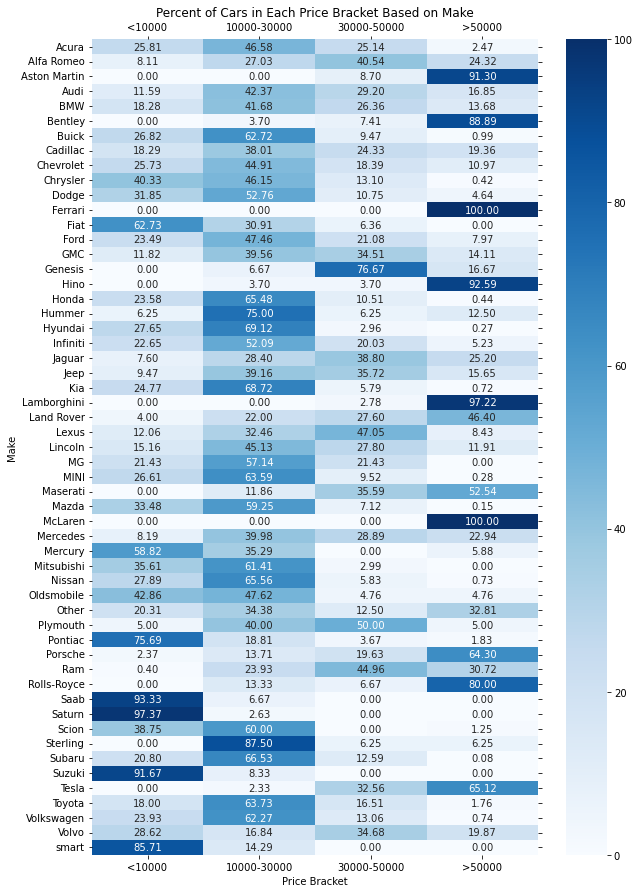

In [454]:
plt.subplots(figsize=(10,15))
sns.heatmap(piv,cmap="Blues",annot=True,fmt=".2f");
plt.xlabel("Price Bracket")
plt.ylabel("Make");
plt.title("Percent of Cars in Each Price Bracket Based on Make");
plt.tick_params(right=True, top=True, labeltop=True,rotation=0);

<b>Insight 1:</b> Premium luxury vehicles such as Aston Martin, Bentley, Rolls-Royce, Ferrari, Tesla, Porsche, Maserati and Lamborghini have overwhelming majority of their cars listed upwards of 50,000\\$. Brands such as Toyota, Honda, Hyundai, Kia and Nissan have their cars mostly listed under the second tier, 10,000\\$ - 30,000\\$. The brands like Saturn, Saab, Suzuki, Smart and Fiat have almost all of their listings under 10,000\\$. This could be due to the lower perception of brand quality in the used market in Canada or perhaps in Ontario in particular.

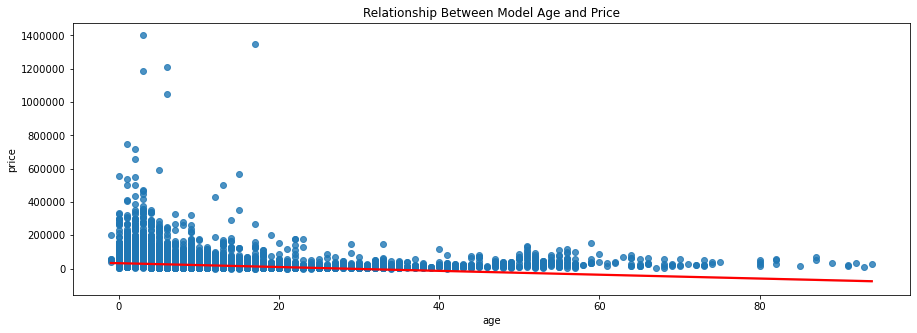

In [455]:
plt.subplots(figsize=(15,5))
g = sns.regplot(x="age",y="price",data=cars)
regline = g.get_lines()[0]
regline.set_color('red')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relationship Between Model Age and Price");

<b>Insight 2:</b> As expected, price goes down as the vehicle ages, sort of insight that is also backed up by the downward sloping curve on the graph above.

<b>Insight 3:</b> Our dataset contains relatively older cars that skew the data a little on the right edge above the red trendline. This should be due to vintage cars for which we already created a new variable earlier. But despite this the Insight 2 still holds. 

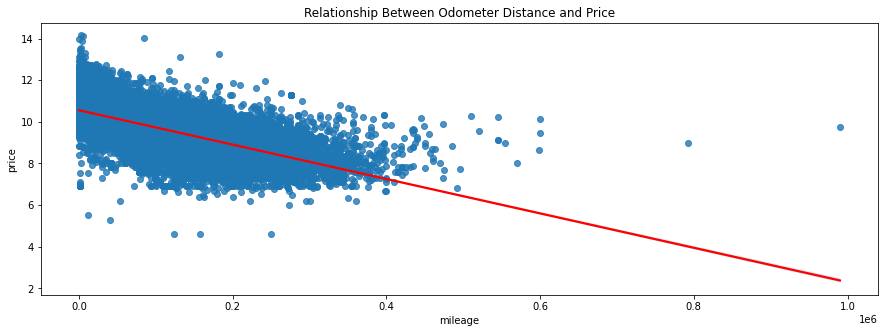

In [456]:
plt.subplots(figsize=(15,5))
g = sns.regplot(x="mileage",y=np.log(cars.price),data=cars) #taking log of the price
regline = g.get_lines()[0]
regline.set_color('red')
plt.title("Relationship Between Odometer Distance and Price");

In [457]:
cars.head()

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,vin_provided,carfax_provided,cylinders,toronto_gta,age,vintage,classifications
0,243517,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014,...,1,0,6,1,14,0,<10000
1,341545,2021-04-16,2021-05-03,2016,Acura,MDX,97902,...,1,1,6,1,5,0,10000-30000
2,345845,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000,...,0,0,8,1,16,0,<10000
3,254761,2021-04-08,2021-05-03,2016,Ford,F-150,186750,...,1,1,8,0,5,0,30000-50000
4,256183,2021-04-08,2021-05-03,2015,Honda,CR-V,124394,...,1,1,4,0,6,0,10000-30000


<b>Insight 4:</b> The trend is obvious that prices go down as car accumulates more mileage on their odometers.

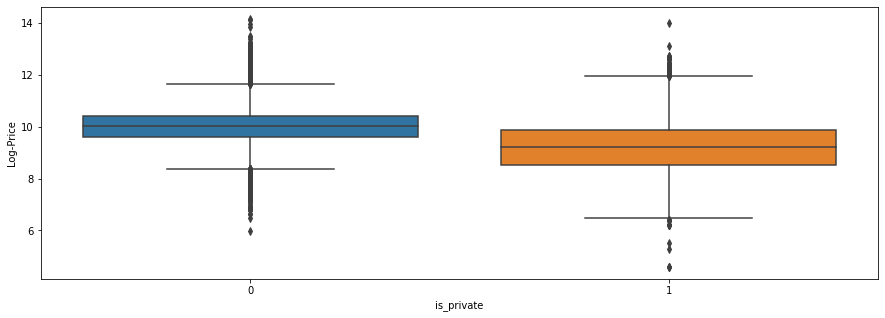

In [458]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.is_private, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 5:</b>
    
* Private sellers tend to have lower prices.

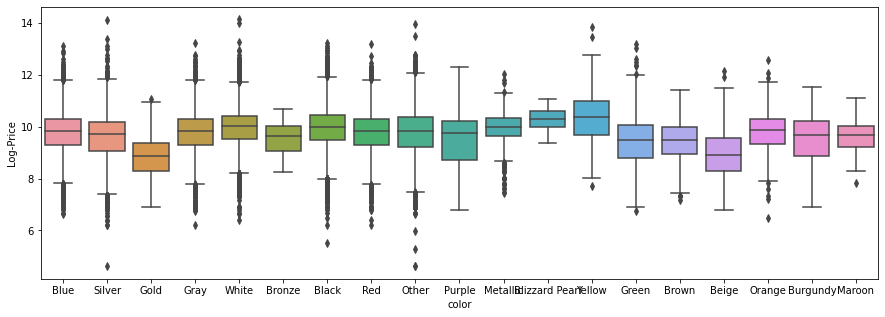

In [459]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.color, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 6:</b>
    
* Selling price does not vary a lot across different body colors. While Yellow, Black and White cars look slightly more expensive, gold-color vehicles sells cheaper than the rest. But again, it is not too much of a difference.

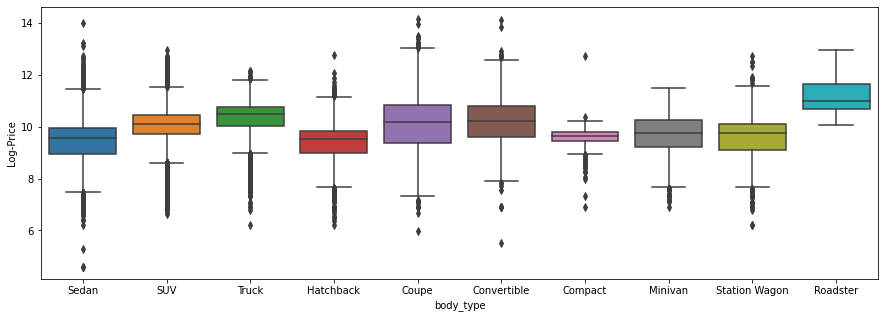

In [460]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.body_type, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 7:</b>
* Body type is an important differentiator. Roadsters are by far the most expensive cars according to the data. This makes sense because sport cars mostly target more wealthy consumers. Trucks follows roadsters on a descending order. Hatchbacks are listed as most affordable cars while sedans follow hatchback in affordability. The graph also displays that two other sporty-looking body types, namely convertibles and coupes, have larger variance, meaning that their prices could go up and down by a lot.

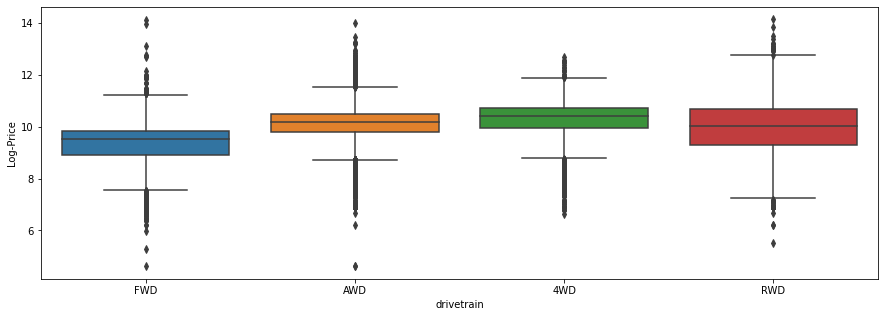

In [461]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.drivetrain, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 8:</b>
* Car prices look similar across different drive train types. That being said, 4WD cars have higher prices than average whereas FWD vehicles stand out as the most affordable type.

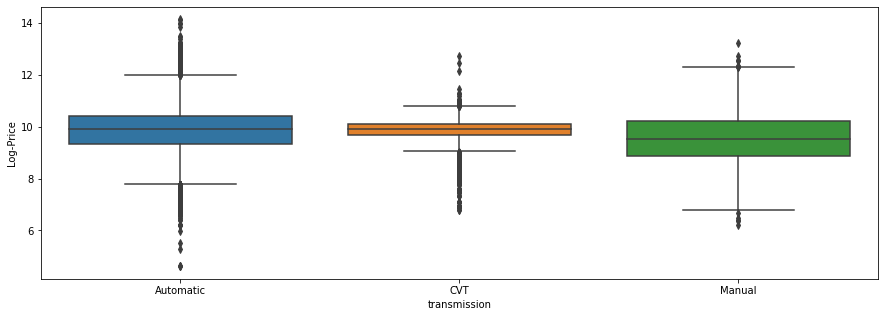

In [462]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.transmission, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 9:</b>
* Transmission types do not make any difference when it comes to price but Manual vehicles sell cheaper than automatic and CVTs in general.

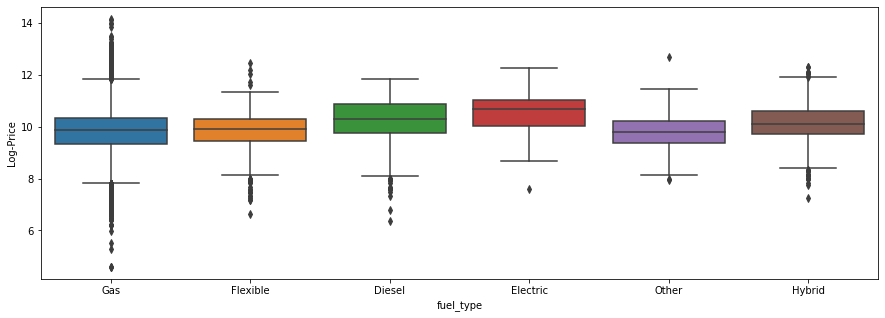

In [463]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.fuel_type, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 10:</b>
* As per fuel type, electric cars are more expensive as expected because they are made with high technology. Meanwhile, hybrid and diesel vehicles are above average too. Technology aspect applies for hybrid cars too. About diesel vehicles, I assume it is due to large engine vehicles like pickups using diesel fuels.

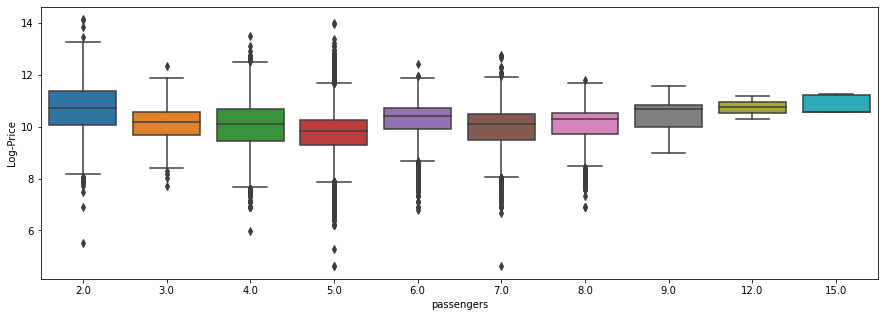

In [464]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.passengers, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 11:</b>
* In terms of passenger capacity, the most popular option is 5. It is the category that is closer to the average the most too. Moving further from 5 to both sides increase price. This should be due to the fact that cars with lower passenger capacity tend to be sport cars and those with higher passenger seats are larger cars like minivans which require a bigger engine with high cost. 

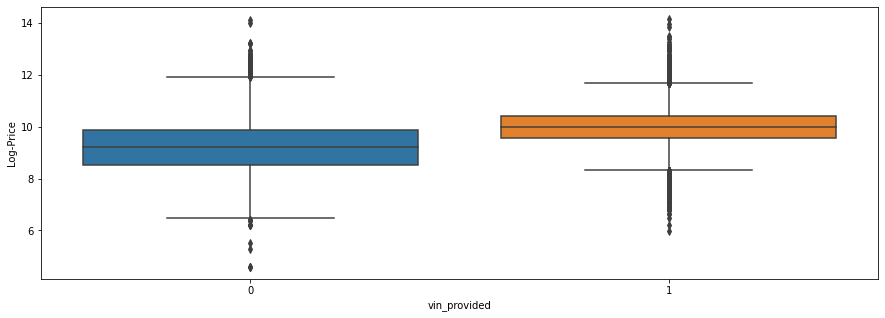

In [465]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.vin_provided, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 


<b>Insight 12:</b>
* An interesting result: if a seller provides VIN number in the listing, its selling price tend to be higher than the others most of the time. Looks like trust is not something you get for free!

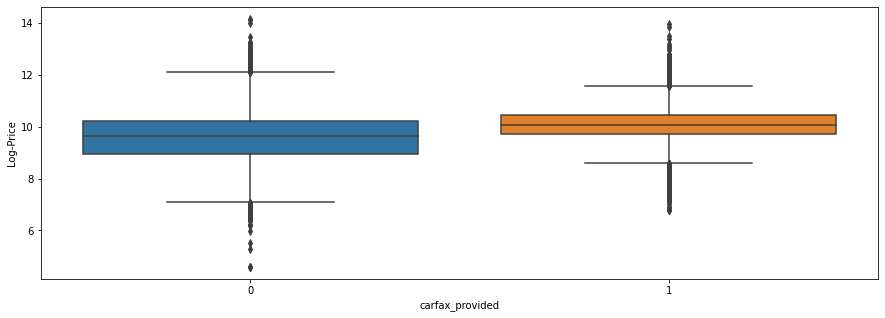

In [466]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.carfax_provided, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 13:</b>
* Same thing for CARFAX report. If it is available, selling prices is mostly higher.

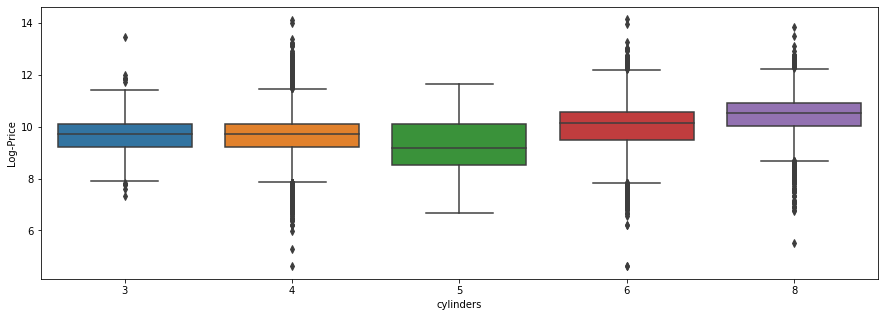

In [467]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.cylinders, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 



<b>Insight 14:</b>
* More cylinders is associated with higher prices. Should be a result of bigger cars with large engine or/and that of sport cars.  

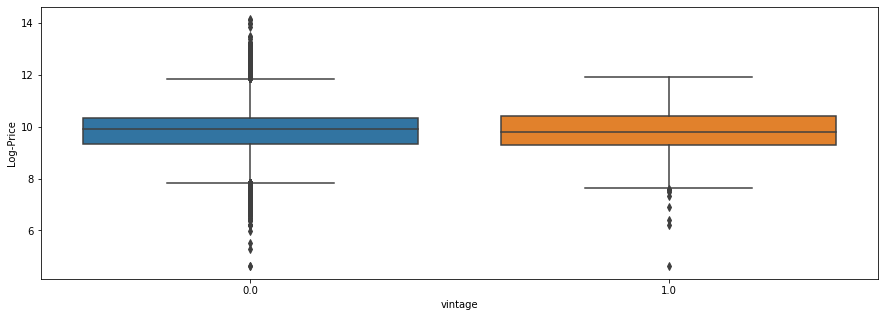

In [468]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.vintage, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 



<b>Insight 15:</b>
* This is surprising because one can expect vintage cars to be most expensive. However, it is also noteworthy that sport vehicles that skew the data are mostly new cars so two fields should be cancelling out each other's effect. It would be interesting to see the impact a combination of both fields might have. We'll explore that in the modelling phase!   

In [469]:
text_list = list(cars.description.astype('str'))
text = '-'.join(text_list)
my_stop_words =["car","power","vehicle","available","Please","drive","price","great","call","vehicles",
                "Control","customer"]+list(STOPWORDS)
wordcloud = WordCloud(stopwords=my_stop_words, collocations=False).generate(text)

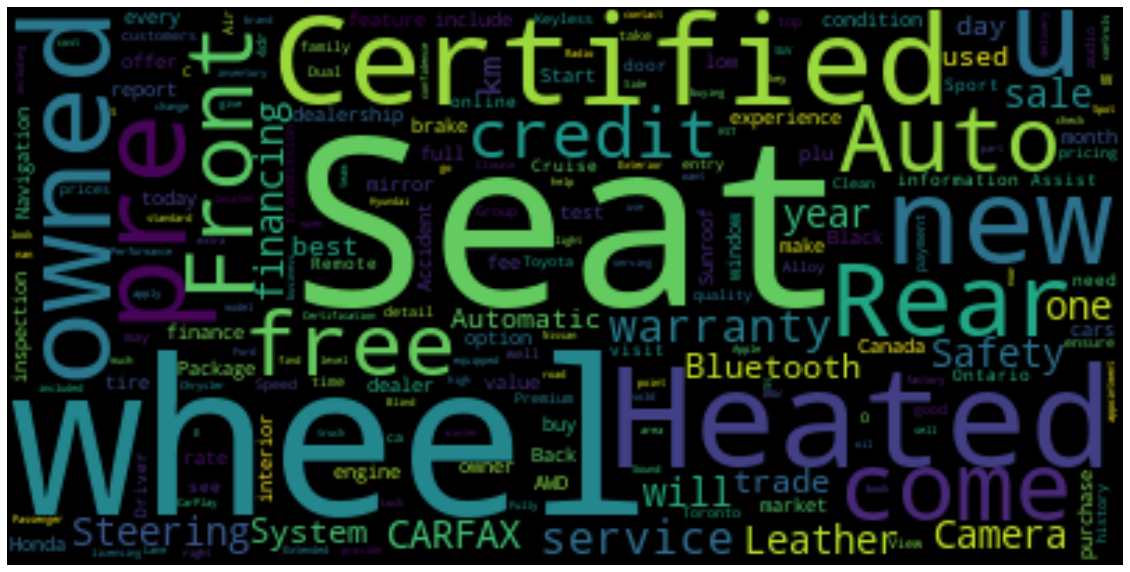

In [470]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<b>Insight 16:</b>

As you might recall already, I merged trim and description fields earlier because they both contain long strings that is not feasible for numeric or categorical transformation. However, the strings stored in both fields are still valuable in the sense that we can capture most common keywords and try to understand what sort of information sellers put on most listings. This would help us know more about popular features on used vehicles and also help us perform a better data collection in further projects.

By applying a WordCloud, a popular tool for sentiment analysis, I have been able to see:
* Cars with heated seats seem to be on demand. The word cloud also captured the words 'Rear' and 'Front'. Those could be in the sense of wheels as well as seats.
* The words 'Certified', 'Pre', 'Owned' could be associated with Certified Pre Owned Vehicles. It should be an on-demand feature on used cars.
* Warranty on used cars is also popular. One might say that most used cars come with a warranty. It could be useful to have a boolean field that checks whether a car has warranty or not. 
* CARFAX is important and it is good that we already have a separate field for that. The word 'Safety' is also popular in a similar vein.
* Credit is another common tag that the Wordcloud has captured. Should be purely due to the fact that 3/4 of the vehicles on our dataset is listed by dealers.
* Camera, bluetooth, sunroof, leather(seats perhaps) are other features that most cars seem to have.

In [471]:
searchfor = ['one owner', 'single owner','one-owner', '1 owner','sole owner','only owner'] #potential tags

cars.loc[cars['description'].str.contains('|'.join(searchfor),na=False,flags=re.IGNORECASE), "one_owner"] = 1
cars.loc[cars.one_owner != 1, 'one_owner'] = 0  
cars.one_owner.value_counts()

0    43671
1     8357
Name: one_owner, dtype: int64

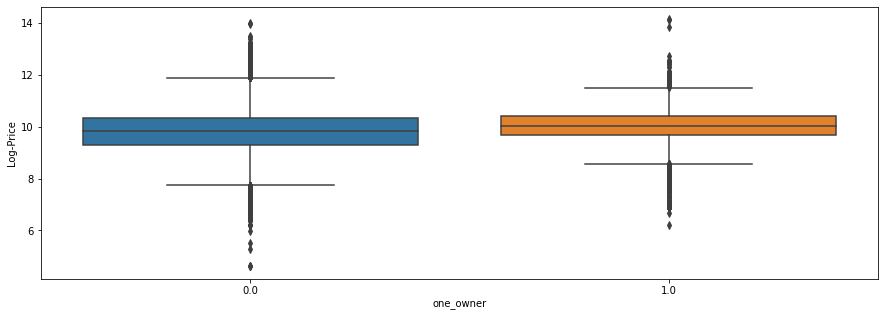

In [472]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.one_owner, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b>Insight 17:</b>

From my own experience being in the market for a used car recently, I think an important factor people seem to justifiably associate prices is the number of previous users. I figured through my personal experience that the fewer previous owners a car has the more expensive its asking price will be. The principle applies to the accident status: If a car is accident free, it could be higher in price.

* A <b>No. of owners</b> column would come in handy. In fact, the code above checks whether the improved description field has such info. Understandably, I had to limit my scope to look for certain vehicles, perhaps those with single owners.
* And voila! Cars with one owner tags in the description are associated with higher prices.

#### Adding new features based on the word cloud
* <b>Heated Seats</b>

In [473]:
cars.loc[cars['description'].str.contains('heated seats',na=False,flags=re.IGNORECASE), "heated_seats"] = 1
cars.loc[cars.heated_seats != 1, 'heated_seats'] = 0  
cars.heated_seats.value_counts()

0    41395
1    10633
Name: heated_seats, dtype: int64

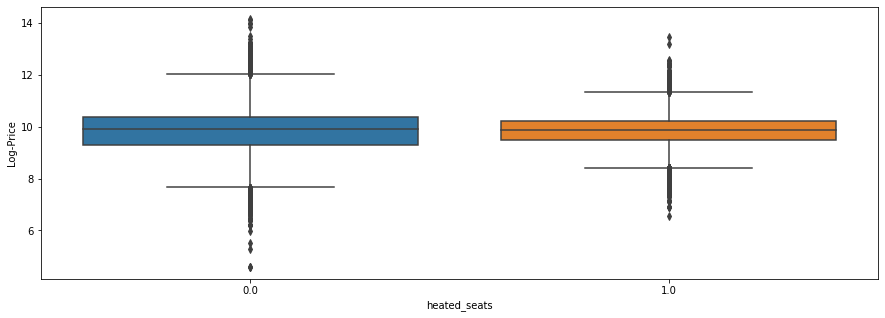

In [474]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.heated_seats, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* <b>Sunroof</b>

In [475]:
cars.loc[cars['description'].str.contains('sunroof',na=False,flags=re.IGNORECASE), "sunroof"] = 1
cars.loc[cars.sunroof != 1, 'sunroof'] = 0  
cars.sunroof.value_counts()

0    41624
1    10404
Name: sunroof, dtype: int64

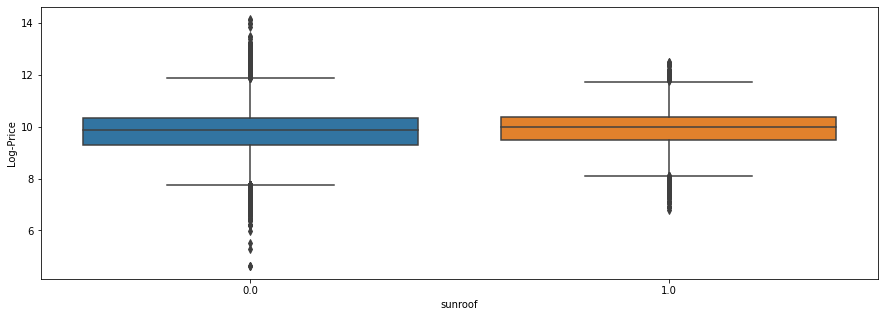

In [476]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.sunroof, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* <b>Camera</b>

In [477]:
cars.loc[cars['description'].str.contains('camera',na=False,flags=re.IGNORECASE), "camera"] = 1
cars.loc[cars.camera != 1, 'camera'] = 0  
cars.camera.value_counts()

0    35635
1    16393
Name: camera, dtype: int64

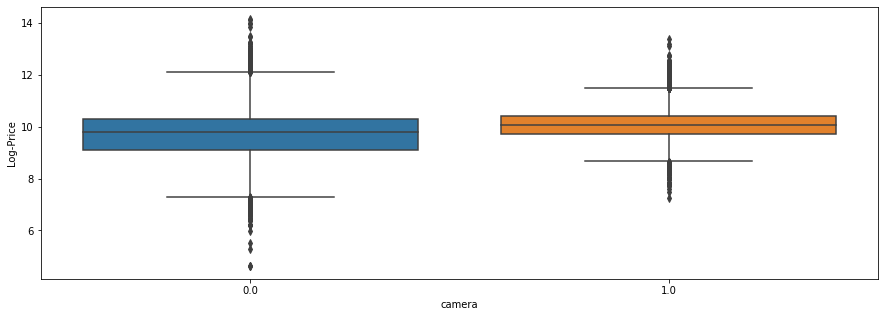

In [478]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.camera, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* One thing I worried a lot about when looking for a used vehicle was whether it had any accients. Let's create a new field called <b>accident_free</b>.

In [479]:
searchfor = ['no accident', 'accident free','no-accident', 'accident-free','no damage','no-damage','no dent','no-dent'] 
# I included no damage tags as well because they are essentially measuring the similar thing.

cars.loc[cars['description'].str.contains('|'.join(searchfor),na=False,flags=re.IGNORECASE), "accident_free"] = 1
cars.loc[cars.accident_free != 1, 'accident_free'] = 0  
cars.accident_free.value_counts()

0    42048
1     9980
Name: accident_free, dtype: int64

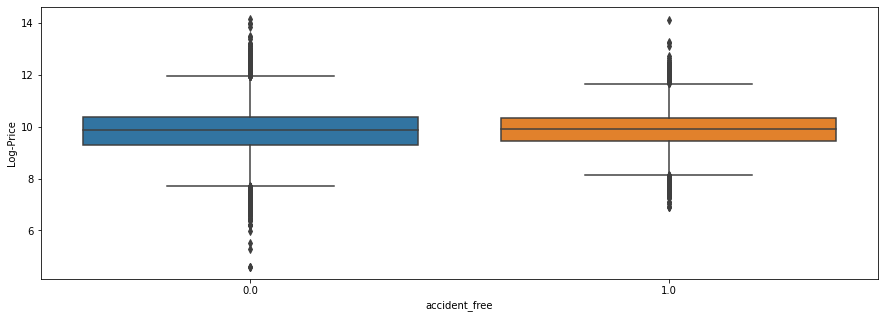

In [480]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.accident_free, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

* <b> Rebuilt status</b>

In [481]:
cars.loc[cars['description'].str.contains('rebuilt',na=False,flags=re.IGNORECASE), "rebuilt"] = 1
cars.loc[cars.rebuilt != 1, 'rebuilt'] = 0  
cars.rebuilt.value_counts()

0    51705
1      323
Name: rebuilt, dtype: int64

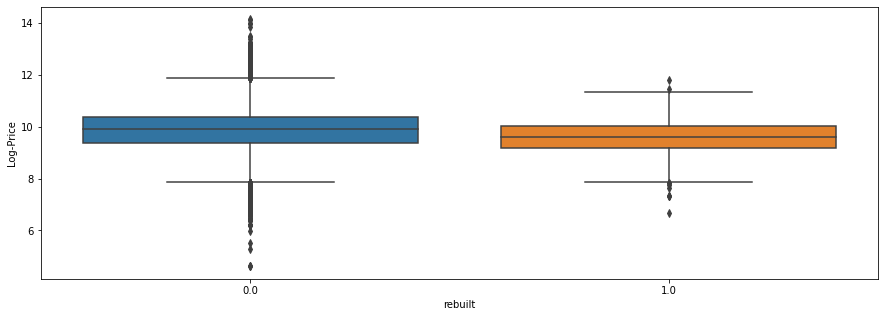

In [303]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.rebuilt, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

In [483]:
cars.loc[cars['description'].str.contains('clean title',na=False,flags=re.IGNORECASE), "clean_title"] = 1
cars.loc[cars.clean_title != 1, 'clean_title'] = 0  
cars.clean_title.value_counts()

0    51461
1      567
Name: clean_title, dtype: int64

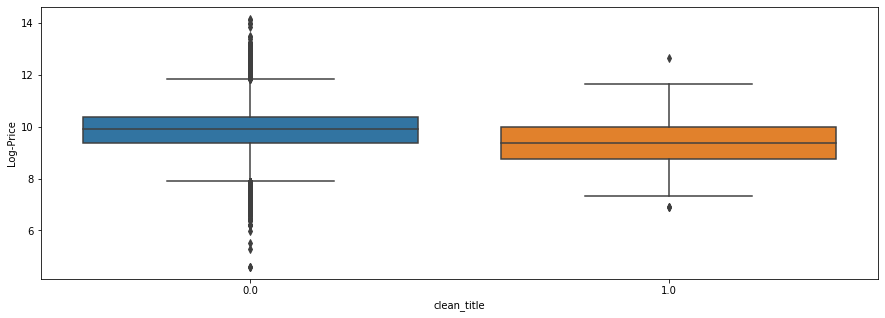

In [484]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.clean_title, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

<b> Insight 18:</b> This is by far the most interesting result from our new variables. The result should have been the other way around. I assume the way we created this column is to blame! We have been able to get title info from only 500 rows (1%) and tagged the rest as NOT HAVING CLEAN TITLE.

In [485]:
cars.loc[cars['description'].str.contains('leather seat',na=False,flags=re.IGNORECASE), "leather_seats"] = 1
cars.loc[cars.leather_seats != 1, 'leather_seats'] = 0  
cars.leather_seats.value_counts()

0    48223
1     3805
Name: leather_seats, dtype: int64

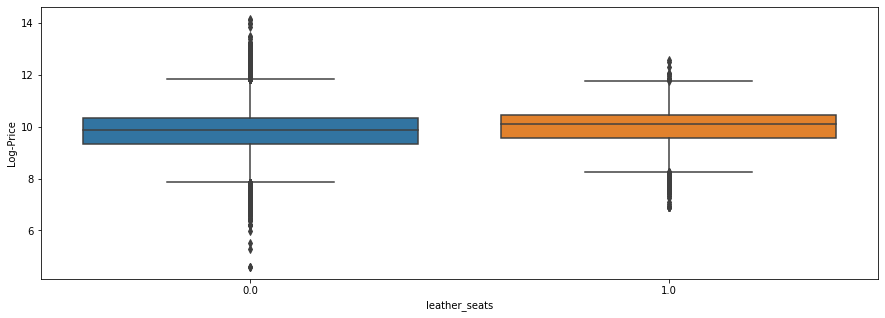

In [486]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.leather_seats, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

In [487]:
cars.loc[cars['description'].str.contains('bluetooth',na=False,flags=re.IGNORECASE), "bluetooth"] = 1
cars.loc[cars.bluetooth != 1, 'bluetooth'] = 0  
cars.bluetooth.value_counts()

0    37419
1    14609
Name: bluetooth, dtype: int64

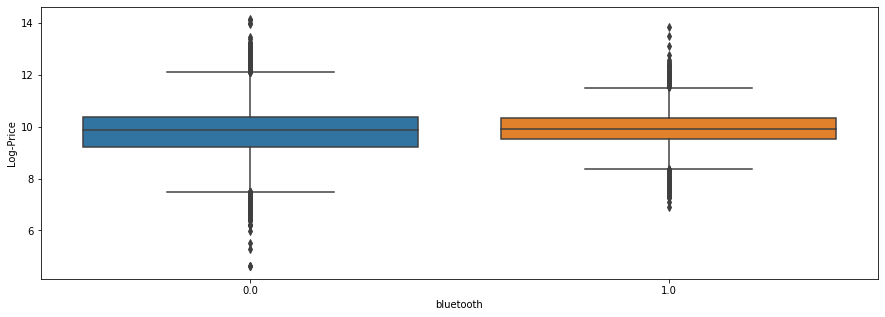

In [488]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=cars.bluetooth, y=np.log(cars.price));
plt.ylabel("Log-Price")
plt.show() 

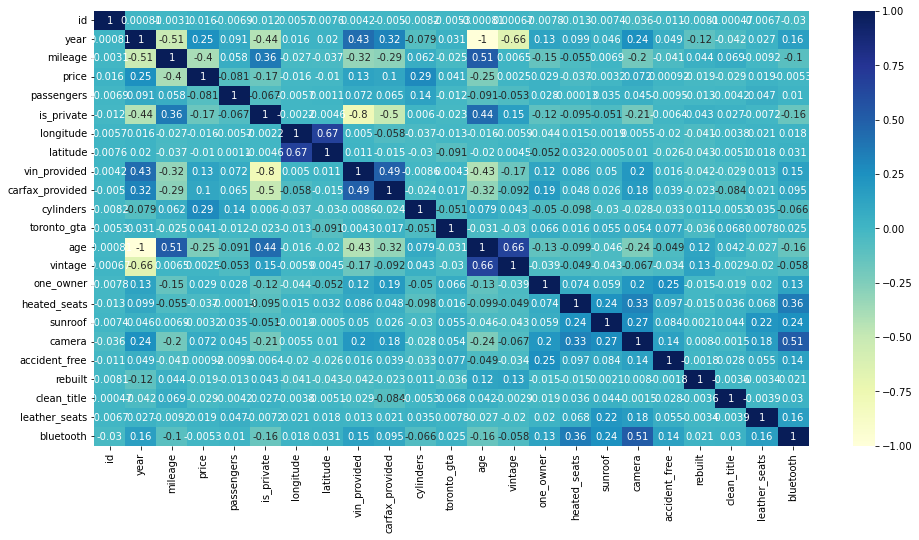

In [490]:
# Sketching our correlating matrix to see if there are any further insights we can drive.

cars_corr = cars.corr()

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cars_corr, cmap="YlGnBu", annot=True)
plt.show()

<b>Insight 19:</b> As displayed in the correlation matrix above, <b>price</b> looks correlated with <b>age</b>, <b>mileage</b> and <b>cylinder</b> variables. Correlation is often confused with causation. The graph above only tells us that there are positive or negative relationship between price and the other highlighted variables. And that's it. It does not imply that cylinders are what make vehicles expensive. There could be a 3rd variable, total engine volume for instance (we removed this variable from our dataset earlier because it had data quality issues.) that is causing prices to get higher and since cylinders are engine size are related, they have a correlation. That being said, causation is often hard to detect and correlation is good enough for basic relationship analysis until we can locate causation!

Another important point to make here is that this matrix might show weak correlation between our target variable, price in this case, and other variables. However, we should not rule out the possibility that some variables have collective relationship with the targer variable. That is, a combination of several different fields might be relevant to exlain price differences and such a quest warrants further and deeper modelling.

### Step 7: Preprocessing for Modelling

We will now process the data and do some feature engineering for our machine learning models.

In [491]:
cars.head()

,id,first_date_seen,last_date_seen,year,make,model,mileage,...,sunroof,camera,accident_free,rebuilt,clean_title,leather_seats,bluetooth
0,243517,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014,...,0,0,0,0,0,0,0
1,341545,2021-04-16,2021-05-03,2016,Acura,MDX,97902,...,0,1,0,0,0,0,0
2,345845,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000,...,1,0,0,0,0,0,0
3,254761,2021-04-08,2021-05-03,2016,Ford,F-150,186750,...,0,0,0,0,0,0,0
4,256183,2021-04-08,2021-05-03,2015,Honda,CR-V,124394,...,1,1,1,0,0,0,1


* Removing unnecessary columns from my dataset

In [492]:
cars_new= cars.drop(columns=['id','first_date_seen','last_date_seen','year','model',
                             'description','longitude','latitude','classifications'])

In [493]:
cars_new.head()

,make,mileage,price,color,body_type,drivetrain,transmission,...,sunroof,camera,accident_free,rebuilt,clean_title,leather_seats,bluetooth
0,Pontiac,166014,3000,Blue,Sedan,FWD,Automatic,...,0,0,0,0,0,0,0
1,Acura,97902,24989,Silver,SUV,AWD,Automatic,...,0,1,0,0,0,0,0
2,Infiniti,108000,6400,Gold,Sedan,AWD,Automatic,...,1,0,0,0,0,0,0
3,Ford,186750,33821,Gray,Truck,4WD,Automatic,...,0,0,0,0,0,0,0
4,Honda,124394,17443,White,SUV,AWD,Automatic,...,1,1,1,0,0,0,1


#### Let's remove some outliers

* In order to have the make field a feasible predictor, I remove vehicles under the 'Other' category that I earlier created for brands which have less than 15 listings under them. They make up around 78 listings in total.

In [494]:
cars_new=cars_new[cars_new.make!='Other']

In [495]:
cars_new.describe()

,mileage,price,passengers,is_private,vin_provided,carfax_provided,cylinders,...,sunroof,camera,accident_free,rebuilt,clean_title,leather_seats,bluetooth
count,51964,51964,51964,51964,51964,51964,51964,...,51964,51964,51964,51964,51964,51964,51964
mean,90564,25313,5,0,1,0,5,...,0,0,0,0,0,0,0
std,69426,28128,1,0,0,0,1,...,0,0,0,0,0,0,0
min,0,100,2,0,0,0,3,...,0,0,0,0,0,0,0
25%,39014,11500,5,0,1,0,4,...,0,0,0,0,0,0,0
50%,73513,19900,5,0,1,0,4,...,0,0,0,0,0,0,0
75%,128642,31500,5,0,1,1,6,...,0,1,0,0,0,0,1
max,990000,1399888,15,1,1,1,8,...,1,1,1,1,1,1,1


* Let's see if we have potential outliers for our target variables by the Interquartile range method.

 <b>Price</b> 

<AxesSubplot:xlabel='price'>

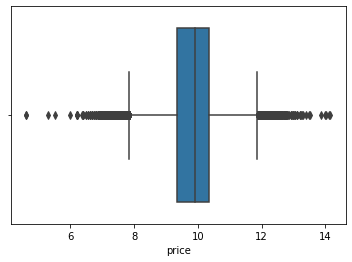

In [496]:
sns.boxplot(np.log(cars_new.price)) # A lot of outliers actually. Let's remove them for our model.

In [497]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR   #upper limit
  LL = Q1 - 1.5*IQR   #lower limit
  return UL, LL

In [498]:
#Apply the function to your data
outlier_limits(cars_new.price)
UL, LL = outlier_limits(cars_new["price"])

In [499]:
cars_new=cars_new[(cars_new.price > LL) & (cars_new.price  < UL)]

<AxesSubplot:xlabel='price'>

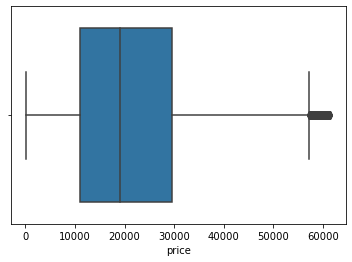

In [500]:
sns.boxplot(cars_new.price)

In [501]:
cars_new.price.describe()

count   49563
mean    21493
std     13508
min       100
25%     10999
50%     18990
75%     29495
max     61495
Name: price, dtype: float64

 <b>Mileage</b> 

<AxesSubplot:xlabel='price'>

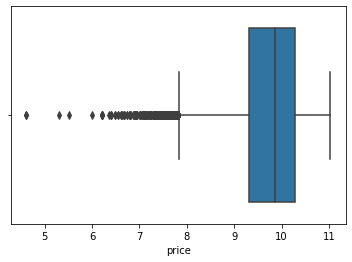

In [502]:
sns.boxplot(np.log(cars_new.price)) # A lot of duplicates here as well. Let's remove them for our model.

In [503]:
outlier_limits(cars_new.mileage)
UL, LL = outlier_limits(cars_new["mileage"])

In [504]:
cars_new=cars_new[(cars_new.mileage > LL) & (cars_new.mileage  < UL)]

<AxesSubplot:xlabel='mileage'>

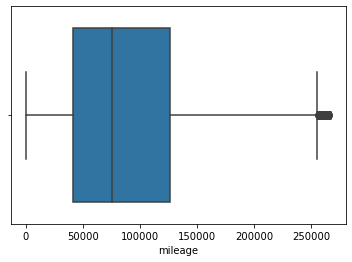

In [505]:
sns.boxplot(cars_new.mileage)

* Let's get our dummy variables for the categorical variables.

In [506]:
dummy_columns=['make','color','body_type','drivetrain','transmission','fuel_type']

cars_new_expanded = pd.get_dummies(cars_new)
cars_new_expanded.head()

,mileage,price,passengers,is_private,vin_provided,carfax_provided,cylinders,...,transmission_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gas,fuel_type_Hybrid,fuel_type_Other
0,166014,3000,7,1,1,0,6,...,0,0,0,0,1,0,0
1,97902,24989,7,0,1,1,6,...,0,0,0,0,1,0,0
2,108000,6400,5,1,0,0,8,...,0,0,0,0,1,0,0
3,186750,33821,5,0,1,1,8,...,0,0,0,0,1,0,0
4,124394,17443,5,0,1,1,4,...,0,0,0,0,1,0,0


In [507]:
pd.set_option('display.float_format', lambda x: '%.6f' % x) #Just a formatting script

std = StandardScaler()
cars_new_expanded_std = std.fit_transform(cars_new_expanded)
cars_new_expanded_std = pd.DataFrame(cars_new_expanded_std, columns = cars_new_expanded.columns)
print(cars_new_expanded_std.shape)
cars_new_expanded_std.head()

(48422, 114)


,mileage,price,passengers,is_private,vin_provided,carfax_provided,cylinders,...,transmission_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gas,fuel_type_Hybrid,fuel_type_Other
0,1.284107,-1.406106,2.140980,1.826731,0.489444,-0.992962,0.844621,...,-0.275545,-0.128453,-0.073616,-0.151253,0.263152,-0.126529,-0.071019
1,0.159860,0.232848,2.140980,-0.547426,0.489444,1.007088,0.844621,...,-0.275545,-0.128453,-0.073616,-0.151253,0.263152,-0.126529,-0.071019
2,0.326536,-1.152686,-0.216615,1.826731,-2.043134,-0.992962,2.388242,...,-0.275545,-0.128453,-0.073616,-0.151253,0.263152,-0.126529,-0.071019
3,1.626372,0.891142,-0.216615,-0.547426,0.489444,1.007088,2.388242,...,-0.275545,-0.128453,-0.073616,-0.151253,0.263152,-0.126529,-0.071019
4,0.597133,-0.329595,-0.216615,-0.547426,0.489444,1.007088,-0.699000,...,-0.275545,-0.128453,-0.073616,-0.151253,0.263152,-0.126529,-0.071019


In [508]:
X_train, X_test, y_train, y_test = train_test_split(cars_new_expanded_std.drop(columns = ['price']), cars_new_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36316, 113)
(12106, 113)
(36316, 1)
(12106, 1)


### Step 8: Modelling

With dummy variables added to our dataset, I ended up with a lot of variables on my hand. For this reason, I am using SelectKBest function from sklearn to choose optimal number of variables from the dataset.

I randomly decide that the final number of variables could be anything from 3 to 100.

<AxesSubplot:>

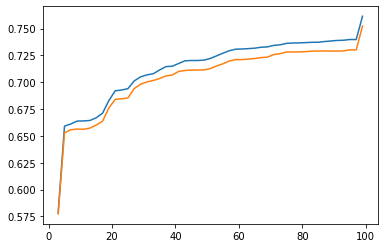

In [509]:
column_names = cars_new_expanded_std.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 100, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

We get an R score of around 0.725 with around 60 variables. It goes up to 0.75 with nearly 100 variables. It is not worth having extra 45 variables for an 0.025 additional points.

I keep k as 60 and let the machine choose best variables.

In [510]:
selector = SelectKBest(f_regression, k = 60)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'passengers', 'is_private', 'vin_provided',
       'carfax_provided', 'cylinders', 'age', 'one_owner', 'sunroof', 'camera',
       'clean_title', 'leather_seats', 'bluetooth', 'make_Audi', 'make_BMW',
       'make_Chrysler', 'make_Dodge', 'make_GMC', 'make_Honda', 'make_Hyundai',
       'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land Rover', 'make_Lexus',
       'make_Maserati', 'make_Mazda', 'make_Mercedes', 'make_Mitsubishi',
       'make_Nissan', 'make_Pontiac', 'make_Porsche', 'make_Ram',
       'make_Saturn', 'make_Tesla', 'make_Volkswagen', 'make_Volvo',
       'color_Beige', 'color_Black', 'color_Blizzard Pearl', 'color_Brown',
       'color_Gold', 'color_Green', 'color_Silver', 'color_White',
       'body_type_Compact', 'body_type_Hatchback', 'body_type_SUV',
       'body_type_Sedan', 'body_type_Station Wagon', 'body_type_Truck',
       'drivetrain_4WD', 'drivetrain_AWD', 'drivetrain_FWD',
       'transmission_Automatic', 'transmission_Manual', 'fuel_type_D

In [511]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [512]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.721019
1,Linear,Ridge(),0.721019
2,Linear,Lasso(),-0.000019
3,Linear,SVR(),0.864068
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.877071
5,Linear,MLPRegressor(),0.870174


### Conclusion:

I got a maximum R^2 score of 0.877 with DecisionTreeRegressor. That means that our model can explain 87.7% of the variation in the used car prices. This is a pretty good score for one. That being said, its actual performance would show when it is tested with new data points in the future. 

If I had more time, I would explore further transformations and fine-tuning like polynomial features and try to increase model performance. I would also love to deploy this model with a user-friendly interface.

I would be curious to have more historic data and account for COVID's impact on the used car market. We've all witnessed that the pandemic has hit the broader auto industry hard. The dataset provided had been collected in the early days of COVID. If I had more time, I would look for more recent data points in order to check if there is any sign of post-pandemic recovery. More time-series data would also help us perform some predictive analysis on Time to Sell as well.

As I mentioned halfway through the project, I have had my own experience looking for a used car very recently. At that time, I've discovered how valuable CARFAX reports could be. If I had more time, I would have looked for ways to get more recent data with non-expired CARFAX links which I would scrape to extract more information like trim level, passenger, liens and accident claim records. 

More data points could mean more geographic coverage as well. This dataset also covers Ontario with few exceptions. However, Clutch operates in four provinces and should be able to provide estimates. I am pretty sure that used car prices show difference depending on province.

In addition to all the points I made above, I think that the domain knowledge also plays a key part. If I had more time, I would have loved to discuss various realities of the sector with someone experienced in the industry and adjusted my analysis accordingly.